In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import math
from mutlistage import MultistagePCY
from time import time
from helper import GetItemsetFromFile, GetSubsectionOfData, SplitDataIntoChunks, PrintTimeInfo, CreatePairDataFrame, SaveDataFrameToHTMLFile, CreateTripleDataFrame, CreatePLPlot

In [2]:
# Get Retail data

In [3]:
s_t = time()
retail_data = GetItemsetFromFile("retail.data")
f_t = time()
print("Time taken to read retail data: %.2f seconds" % (f_t - s_t))

Time taken to read retail data: 0.23 seconds


In [4]:
support_values = [0.01, 0.02, 0.05]
split_data_values = [0.2, 0.4, 1]

In [5]:
multi_pair_timings = []
# Perfom MultistagePCY on pairs of data for all support values and split data values
for data_split in split_data_values:
    for support in support_values:
        data = GetSubsectionOfData(retail_data, data_split) # Get % of data
        file_name = "mutli-pcy-ret-p-"+str(round(data_split*100))+"-" + str(round(support*100))   # Set file name

        s_t = time()    # Start Time
        occ, freq = MultistagePCY(data, support, 2)
        f_t = time()    # End Time
        multi_pair_timings.append((f_t - s_t))
        PrintTimeInfo("MultistagePCY", (data_split * 100), (f_t - s_t), support, "pairs")
        #df = CreatePairDataFrame(occ, freq, len(data))
        #SaveDataFrameToHTMLFile(df, file_name)
    print("Done running MultistagePCY pairs on %d%% of data" % (data_split * 100)+"\n")

Time taken to complete MultistagePCY on 20% of data using pairs of retail data: 7.57 seconds with support: 1%
Time taken to complete MultistagePCY on 20% of data using pairs of retail data: 4.63 seconds with support: 2%
Time taken to complete MultistagePCY on 20% of data using pairs of retail data: 3.24 seconds with support: 5%
Done running MultistagePCY pairs on 20% of data

Time taken to complete MultistagePCY on 40% of data using pairs of retail data: 14.18 seconds with support: 1%
Time taken to complete MultistagePCY on 40% of data using pairs of retail data: 8.91 seconds with support: 2%
Time taken to complete MultistagePCY on 40% of data using pairs of retail data: 6.79 seconds with support: 5%
Done running MultistagePCY pairs on 40% of data

Time taken to complete MultistagePCY on 100% of data using pairs of retail data: 35.14 seconds with support: 1%
Time taken to complete MultistagePCY on 100% of data using pairs of retail data: 22.20 seconds with support: 2%
Time taken to com

In [6]:
multi_triple_timings = []
# Perfom MultistagePCY on triples of data for all support values and split data values
for data_split in split_data_values:
    for support in support_values:
        data = GetSubsectionOfData(retail_data, data_split) # Get % of data
        file_name = "mutli-pcy-ret-t-"+str(round(data_split*100))+"-" + str(round(support*100))   # Set file name

        s_t = time()    # Start Time
        freq = MultistagePCY(data, support, 3)
        f_t = time()    # End Time
        multi_triple_timings.append((f_t - s_t))
        PrintTimeInfo("MultistagePCY", (data_split * 100), (f_t - s_t), support, "triples")
        #df = CreateTripleDataFrame(freq)
        #SaveDataFrameToHTMLFile(df, file_name)
    print("Done running MultistagePCY triples on %d%% of data" % (data_split * 100)+"\n")

Time taken to complete MultistagePCY on 20% of data using triples of retail data: 6.86 seconds with support: 1%
Time taken to complete MultistagePCY on 20% of data using triples of retail data: 4.33 seconds with support: 2%
Time taken to complete MultistagePCY on 20% of data using triples of retail data: 3.22 seconds with support: 5%
Done running MultistagePCY triples on 20% of data

Time taken to complete MultistagePCY on 40% of data using triples of retail data: 14.16 seconds with support: 1%
Time taken to complete MultistagePCY on 40% of data using triples of retail data: 8.72 seconds with support: 2%
Time taken to complete MultistagePCY on 40% of data using triples of retail data: 7.29 seconds with support: 5%
Done running MultistagePCY triples on 40% of data

Time taken to complete MultistagePCY on 100% of data using triples of retail data: 37.72 seconds with support: 1%
Time taken to complete MultistagePCY on 100% of data using triples of retail data: 23.11 seconds with support: 

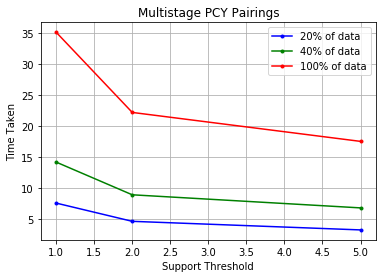

In [7]:
CreatePLPlot(multi_pair_timings, support_values, "Multistage PCY Pairings")

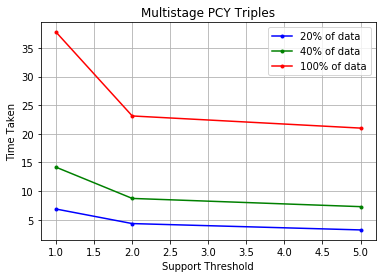

In [8]:
CreatePLPlot(multi_triple_timings, support_values, "Multistage PCY Triples")